In [2]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import interactive
interactive(True)

plt.style.use('seaborn-deep')
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [5]:
# Load Data
data = pd.read_csv('treecorder_data.csv')

# Utilities
def time_strings(data):
    return [d + ' '+ t for d, t in zip(data['Date'], data['Time'])]

## Define rainfall color map
from matplotlib.colors import ListedColormap

N = 256
c1 = np.array((151, 201, 199)) / N
c2 = np.array((23, 38, 147)) / N
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(c1[0], c2[0], N)
vals[:, 1] = np.linspace(c1[1], c2[1], N)
vals[:, 2] = np.linspace(c1[2], c2[2], N)
rainfall = ListedColormap(vals)

data

,Date,Time,Moisture,Temperature,Humidity,X,Y,Z,R,G,B
0,11/14/2019,13:16:03,283,124.99,99.99,2.00,0.25,1.01,NaN,NaN,NaN
1,11/14/2019,13:16:14,129,124.99,99.99,2.00,0.24,1.00,NaN,NaN,NaN
2,11/14/2019,13:16:25,128,124.99,99.99,2.00,0.23,1.00,NaN,NaN,NaN
3,11/14/2019,13:16:35,278,124.99,99.99,2.00,0.24,1.01,NaN,NaN,NaN
4,11/14/2019,13:16:46,120,124.99,99.99,2.00,0.23,1.06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
417,11/20/2019,13:00:49,322,8.34,52.64,0.33,-0.19,0.91,NaN,NaN,NaN
418,11/20/2019,13:01:00,314,8.35,52.48,0.34,-0.20,0.91,NaN,NaN,NaN
419,11/20/2019,13:01:12,287,8.35,52.44,0.34,-0.20,0.90,NaN,NaN,NaN
420,11/20/2019,13:01:23,367,8.36,52.28,0.34,-0.19,0.91,NaN,NaN,NaN


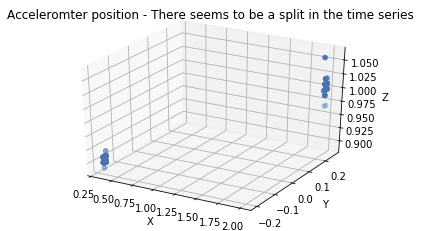

In [3]:
# %matplotlib qt
%matplotlib inline 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['X'], data['Y'], data['Z'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set(title='Acceleromter position - There seems to be a split in the time series')
plt.show()

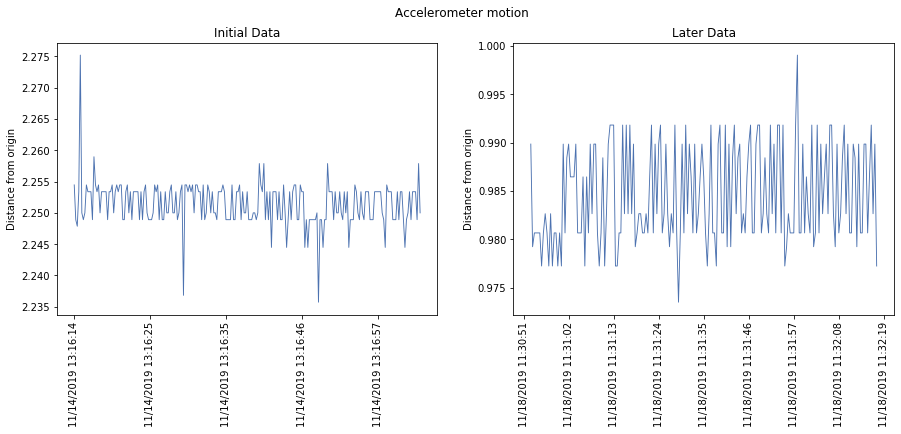

In [4]:
# Plot Accelerometer distance
%matplotlib inline 

init_data = data[:229]
late_data = data[229:]

fig, axs = plt.subplots(1,2, figsize=(15,5))

def dist(data):
    x, y, z = data['X'], data['Y'], data['Z']
    return np.sqrt(x**2 + y**2 + z**2);

axs[0].set(title='Initial Data', ylabel='Distance from origin')
axs[1].set(title='Later Data', ylabel='Distance from origin')
axs[0].set_xticklabels([d + ' '+ t for d, t in zip(init_data['Date'], init_data['Time'])], rotation=90)
axs[1].set_xticklabels([d + ' '+ t for d, t in zip(late_data['Date'], late_data['Time'])], rotation=90)
axs[0].plot(dist(init_data), linewidth=0.9)
axs[1].plot(dist(late_data), linewidth=0.9)
fig.suptitle('Accelerometer motion')
plt.show()

range 89 1023


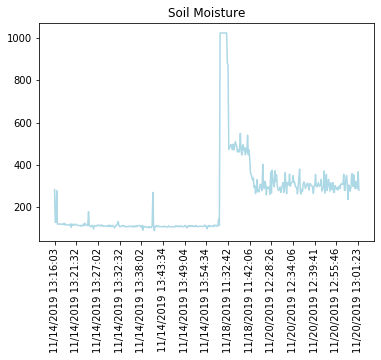

In [5]:
# Plot Moisture
%matplotlib inline 

m_fig = plt.figure()
m_ax = m_fig.add_subplot(111)

moisture = data['Moisture']

print('range', moisture.min(), moisture.max())

m_ax.set(title="Soil Moisture")
plt.xticks(range(len(data))[::30], time_strings(data)[::30], rotation=90)
m_ax.plot(moisture, color='lightblue')

range 4.68 124.99
range 51.99 99.99


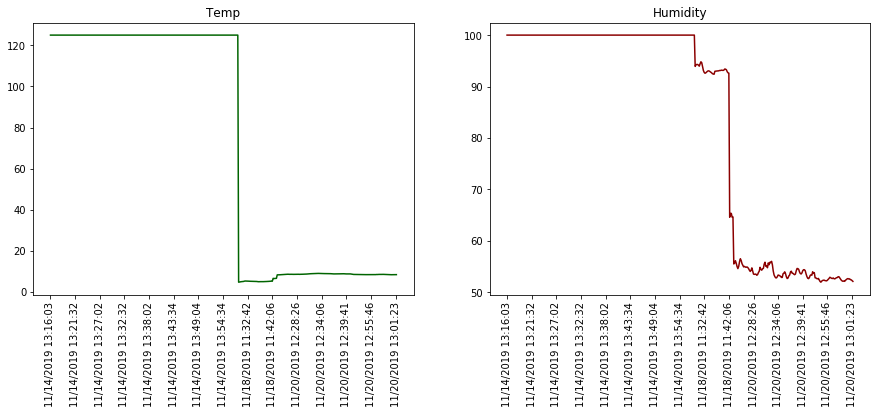

In [6]:
# Plot Moisture
%matplotlib inline 

fig, axs = plt.subplots(1,2, figsize=(15,5), sharex=True)

temp = data['Temperature']
print('range', temp.min(), temp.max())

axs[0].set(title="Temp")
axs[0].plot(temp, color='darkgreen')
axs[0].tick_params(axis='x', rotation=90)

hum = data['Humidity']
print('range', hum.min(), hum.max())

axs[1].set(title="Humidity")
axs[1].plot(hum, color='darkred')
axs[1].tick_params(axis='x', rotation=90)

axs[1].set_xticks(range(len(data))[::30])
axs[1].set_xticklabels(time_strings(data)[::30])

plt.show()

In [9]:
# Datetime conversion utils
from datetime import datetime
print(time_strings(data)[0])
def time(string):
    return datetime.strptime(string, '%m/%d/%Y %H:%M:%S')
times = [time(s) for s in time_strings(data)]
print(times[0])

11/14/2019 13:16:03
2019-11-14 13:16:03


(422, 11)


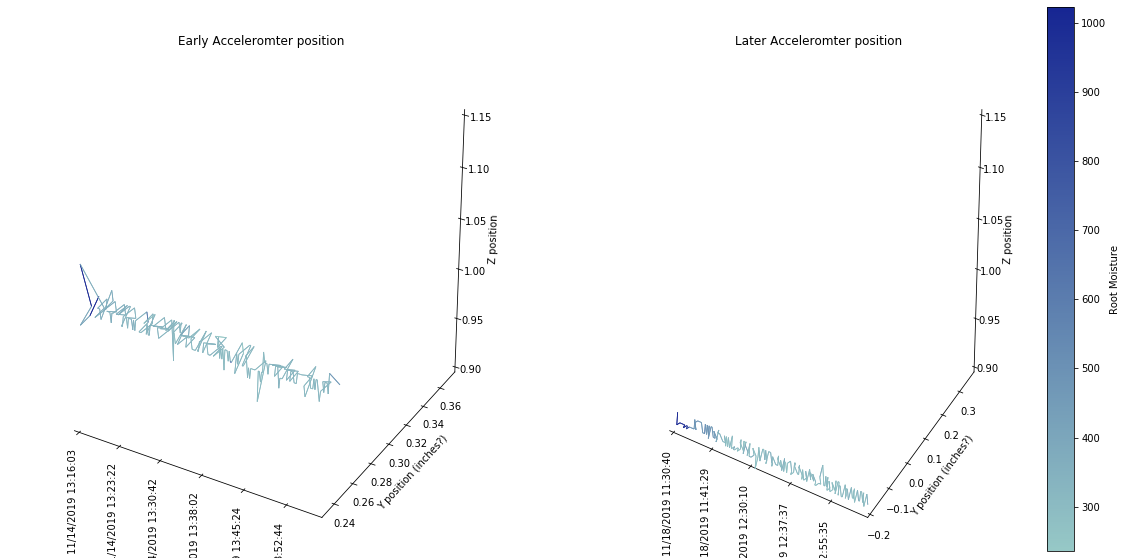

In [16]:
# https://stackoverflow.com/questions/38079366/matplotlib-line3dcollection-multicolored-line-edges-are-jagged
# https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Toggle between these two lines for interactivity or inline plotting
%matplotlib qt 
# %matplotlib inline 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

data = pd.read_csv('treecorder_data.csv')

init_data = data[:229]
late_data = data[229:]

print(np.shape(data))

def plot_motion(ax, data):
    x_plus_t = data['X'] + np.multiply(range(len(data)), 10)

    x, y, z = x_plus_t, data['Y'], data['Z']
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a norm to map from data points to colors
    moisture = data['Moisture']
    norm = plt.Normalize(moisture.min(), moisture.max())
    lc = Line3DCollection(segments, cmap=rainfall, norm=norm)
    # Set the values used for colormapping
    lc.set_array(moisture)
    lc.set_linewidth(0.8)
    line = ax.add_collection3d(lc)

    ax.set_xlim(min(x), max(x))
    # ax2.set_ylim(0.125, 0.375)
    ax.set_ylim(min(y), 0.375)
    ax.set_zlim(0.9, 1.15)
    ax.add_collection3d(lc)

    # ax2.set_xlabel('Time + X')
    ax.xaxis._axinfo['label']['space_factor'] = 10
    ax.set_ylabel('Y position (inches?)')
    ax.set_zlabel('Z position')

    # Remove gridlines and pane backgrounds
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Set x labels every 40th sample
    ax.set_xticks(x_plus_t[::40])
    ax.set_xticklabels(time_strings(data)[::40])
    ax.tick_params(axis='x', rotation=90)
    
    return lc

    
    
plot_motion(ax, init_data)
lc = plot_motion(ax2, late_data)

ax.set(title='Early Acceleromter position')
ax2.set(title='Later Acceleromter position')

colorbar = fig.colorbar(lc, ax=ax2)
colorbar.set_label('Root Moisture')

plt.show()

In [71]:
np.shape(x_plus_t), np.shape(time_strings(data))

((229,), (229,))